In [99]:
import scipy.stats as sts
import sympy as sp
import numpy as np
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import math
import pandas as pd

In [100]:
# Для среднего нормального распределения при известной дисперсии
data = sts.norm.rvs(loc=23, scale=11.3, size=100000)
sample_size = 10
sample = np.random.choice(a= data, size = sample_size)
sample_mean = sample.mean()
alpha=0.5
zalpha = sts.norm.isf(alpha/2) # Верхняя процентная точка*
print("Верхняя процентная точка:") 
print(zalpha) 
stdev = data.std() # Стандартное отклонение из генеральнйо совокупности
delta = zalpha * (stdev/math.sqrt(sample_size))
confidence_interval = (sample_mean - delta,
 sample_mean + delta) 
print("Доверительный интервал:")
print(confidence_interval)

Верхняя процентная точка:
0.6744897501960817
Доверительный интервал:
(20.968750635569158, 25.788343559799678)


In [101]:
sample_size = 1000
sample_means=[]
intervals = []
b=[]
t=[]
c=[]
n=50
for sample in range(n):
    sample = np.random.choice(a= data, size = sample_size)
    sample_mean = sample.mean()
    sample_means.append(sample_mean)
    zalpha = sts.norm.isf(alpha/2) 
    stdev = data.std() 
 
    delta = zalpha * (stdev/math.sqrt(sample_size))
 
    confidence = (sample_mean - delta, sample_mean + delta) 
    intervals.append(confidence)
for bot,top in intervals:
    b.append(bot)
    t.append(top)
    c.append((top-bot)/2)


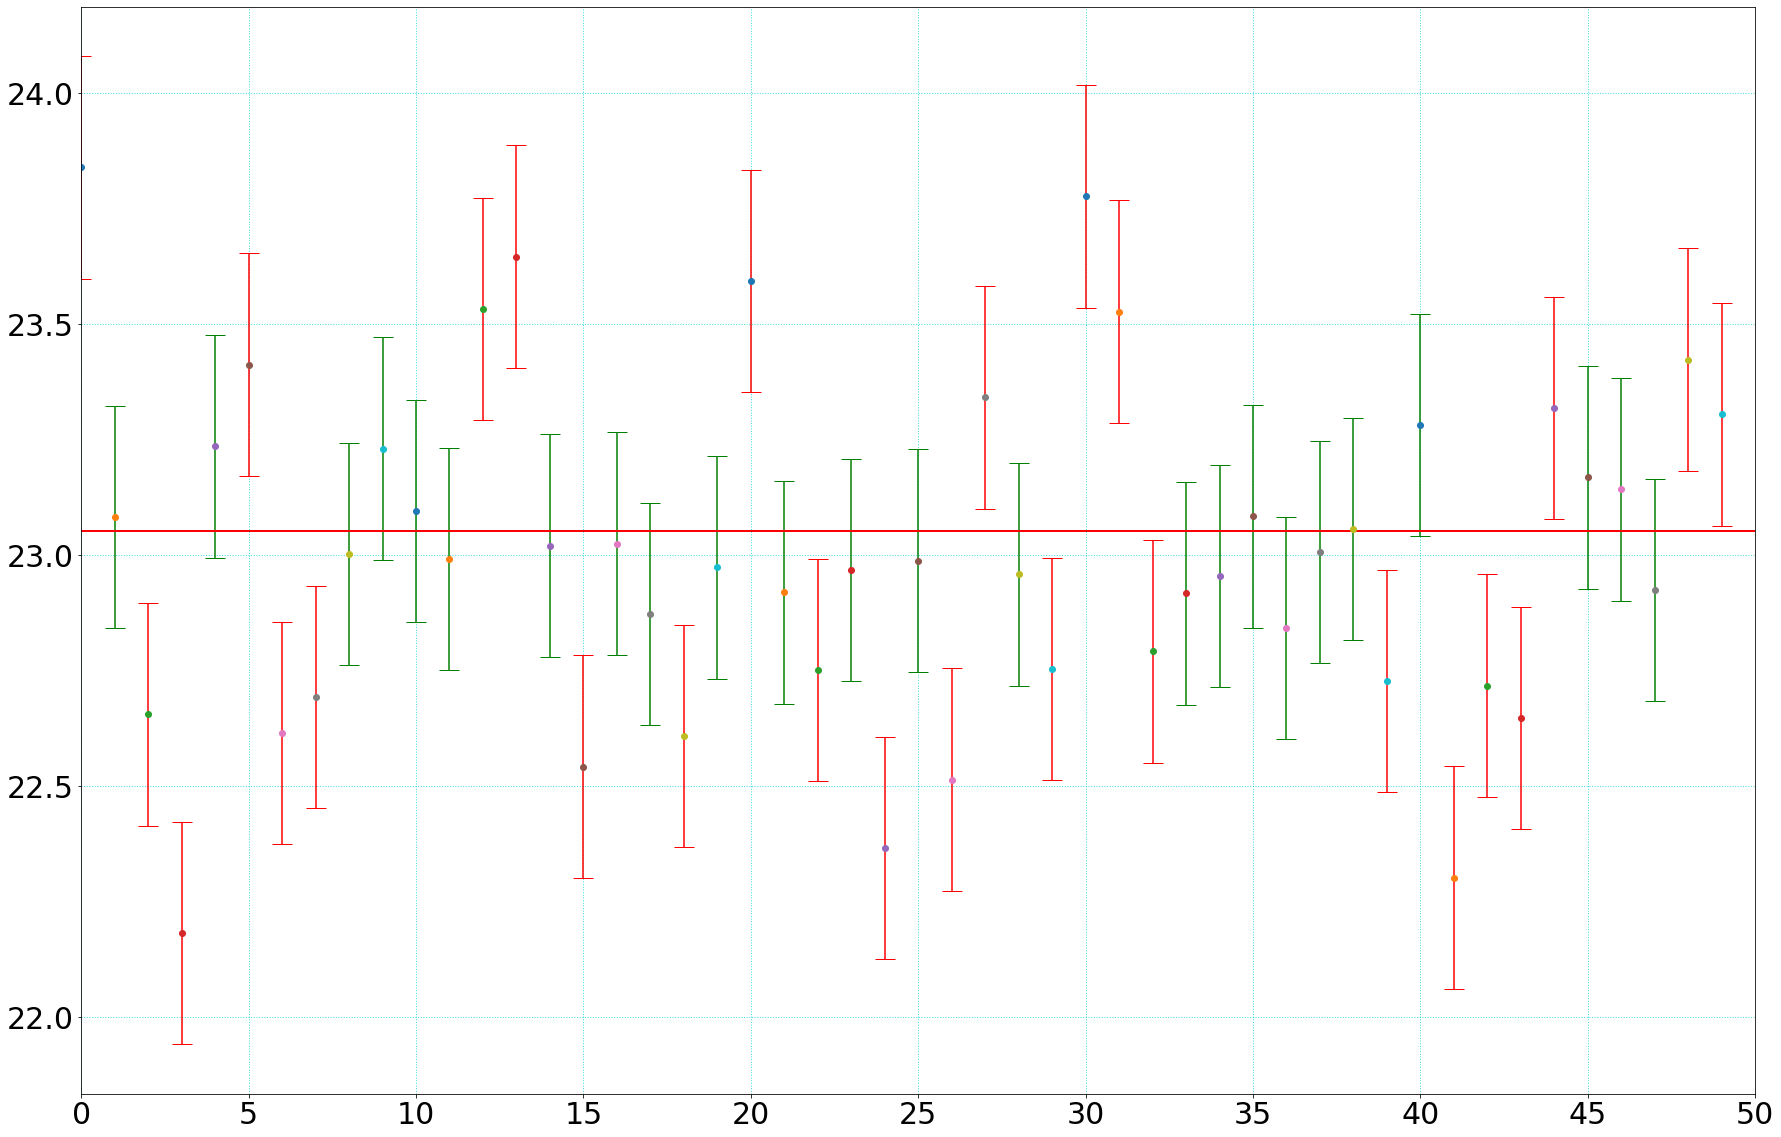

In [102]:
fig,ax =plt.subplots(figsize=(30, 20))
plt.tick_params(labelsize = 30)
ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.5))
plt.tick_params(labelsize = 30)
plt.grid(color='DarkTurquoise', alpha=0.75, linestyle=':', linewidth=1)
plt.xlim(0,50)

k=0
m=0
for i in range(len(intervals)):
    if b[i] < np.mean(data)<t[i]:
        plt.errorbar(x=i, y=sample_means[i], yerr=c[i],fmt='-o',ecolor='g',capsize=10.0)
        m=m+1
    else:
        plt.errorbar(x=i, y=sample_means[i], yerr=c[i],fmt='-o',ecolor='r',capsize=10)
        k=k+1
plt.hlines(xmin=0, xmax=n, y=np.mean(data), linewidth=2.0,color="red")

In [103]:
# Для среднего нормального распределения в случае неизвестной дисперсии
data = sts.norm.rvs(loc=23, scale=11.3, size=100000)
sample_size = 10
sample = np.random.choice(a= data, size = sample_size)
sample_mean = sample.mean()
alpha=0.1
X_ = sample.mean()
S = sample.std(ddof = 1)
mu_b = X_ - sts.t(sample_size - 1).isf(alpha/2) * S / math.sqrt(sample_size)
mu_u = X_ + sts.t(sample_size - 1).isf(alpha/2) * S / math.sqrt(sample_size)
confidence_interval = (mu_b, mu_u) 
print("Доверительный интервал:")
print(confidence_interval)

Доверительный интервал:
(17.325562595915457, 28.475650833943405)


In [104]:
sample_size = 1000
sample_means=[]
intervals = []
b=[]
t=[]
c=[]
n=50
for sample in range(n):
    sample = np.random.choice(a = data, size = sample_size)
    sample_mean = sample.mean()
    sample_means.append(sample_mean)
    X_ = sample.mean()
    S = sample.std(ddof = 1)
    mu_b = X_ - sts.t(sample_size - 1).isf(alpha/2) * S / math.sqrt(sample_size)
    mu_u = X_ + sts.t(sample_size - 1).isf(alpha/2) * S / math.sqrt(sample_size)
    confidence_interval = (mu_b, mu_u) 
    intervals.append(confidence_interval)
for bot,top in intervals:
    b.append(bot)
    t.append(top)
    c.append((top-bot)/2)


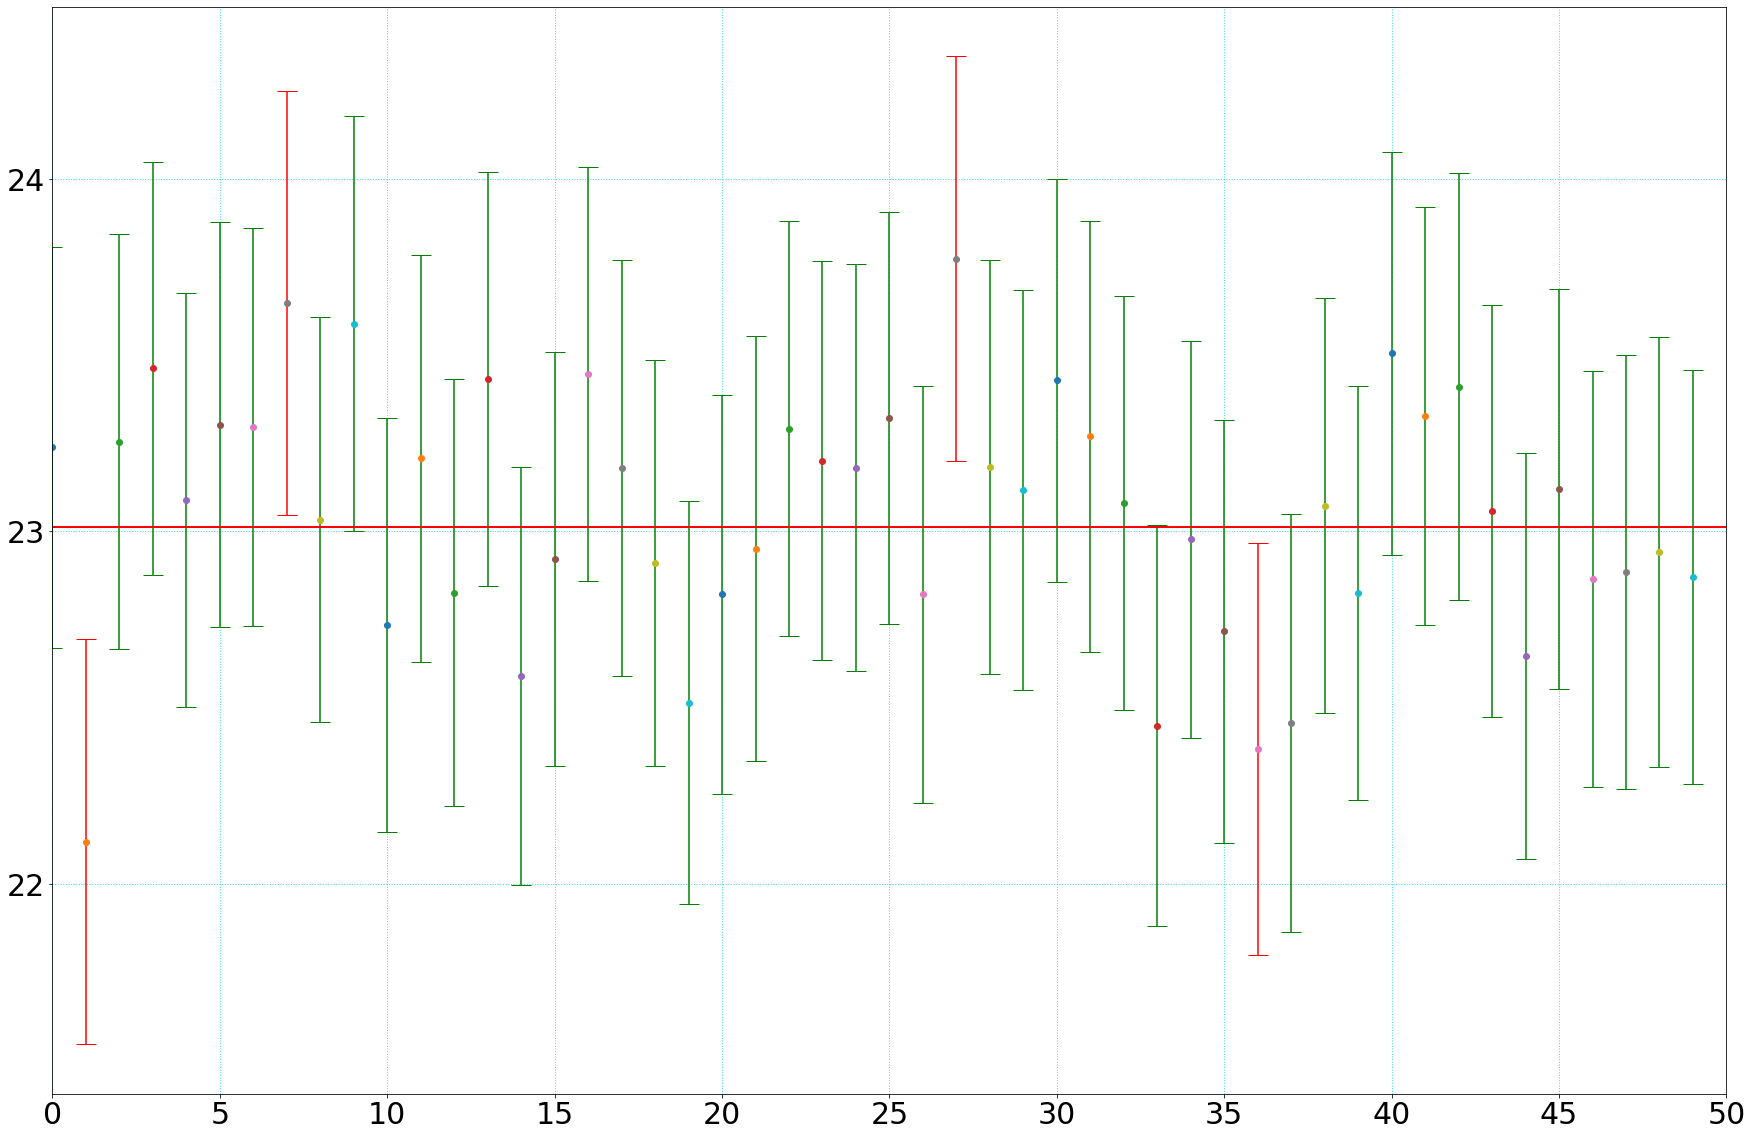

In [105]:
fig,ax =plt.subplots(figsize=(30, 20))
plt.tick_params(labelsize = 30)
ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
plt.tick_params(labelsize = 30)
plt.grid(color='DarkTurquoise', alpha=0.75, linestyle=':', linewidth=1)
plt.xlim(0,50)
k=0
m=0
for i in range(len(intervals)):
    if b[i] < np.mean(data)<t[i]:
        plt.errorbar(x=i, y=sample_means[i], yerr=c[i],fmt='-o',ecolor='g',capsize=10.0)
        m=m+1
    else:
        plt.errorbar(x=i, y=sample_means[i], yerr=c[i],fmt='-o',ecolor='r',capsize=10)
        k=k+1
plt.hlines(xmin=0, xmax=n, y=data.mean(), linewidth=2.0,color="red")

In [106]:
# Для параметра масштаба в случае известного среднего
data = sts.norm.rvs(loc=23, scale=127.69**(1/2), size=100000)
sample_size = 10
sample = np.random.choice(a= data, size = sample_size)
sample_mean = sample.mean()
alpha=0.1
mu = data.mean()
sample_std = math.sqrt(1/len(sample) * sum((sample - data.mean())**2))
S_0 = math.sqrt(1/len(sample) * sum((sample - data.mean())**2))
theta_1 = len(sample) * S_0**2/sts.chi2(len(sample)).isf(alpha/2)
theta_2 = len(sample) * S_0**2/sts.chi2(len(sample)).isf(1 - alpha/2)
print("Доверительный интервал:")
print(confidence_interval)

Доверительный интервал:
(22.28216603937763, 23.4578526499253)


In [107]:
sample_size = 1000
sample_stds=[]
intervals = []
b=[]
t=[]
c=[]
n=50
for sample in range(n):
    sample = np.random.choice(a = data, size = sample_size)
    sample_std0 = math.sqrt(1/len(sample) * sum((sample - data.mean())**2))
    sample_stds.append(sample_std0)
    S_0 = math.sqrt(1/len(sample) * sum((sample - mu)**2))
    theta_1 = len(sample) * S_0**2/sts.chi2(len(sample)).isf(alpha/2)
    theta_2 = len(sample) * S_0**2/sts.chi2(len(sample)).isf(1 - alpha/2)
    confidence_interval = (math.sqrt(theta_1), math.sqrt(theta_2))
    intervals.append(confidence_interval)
for bot,top in intervals:
    b.append(bot)
    t.append(top)
    c.append((top-bot)/2)


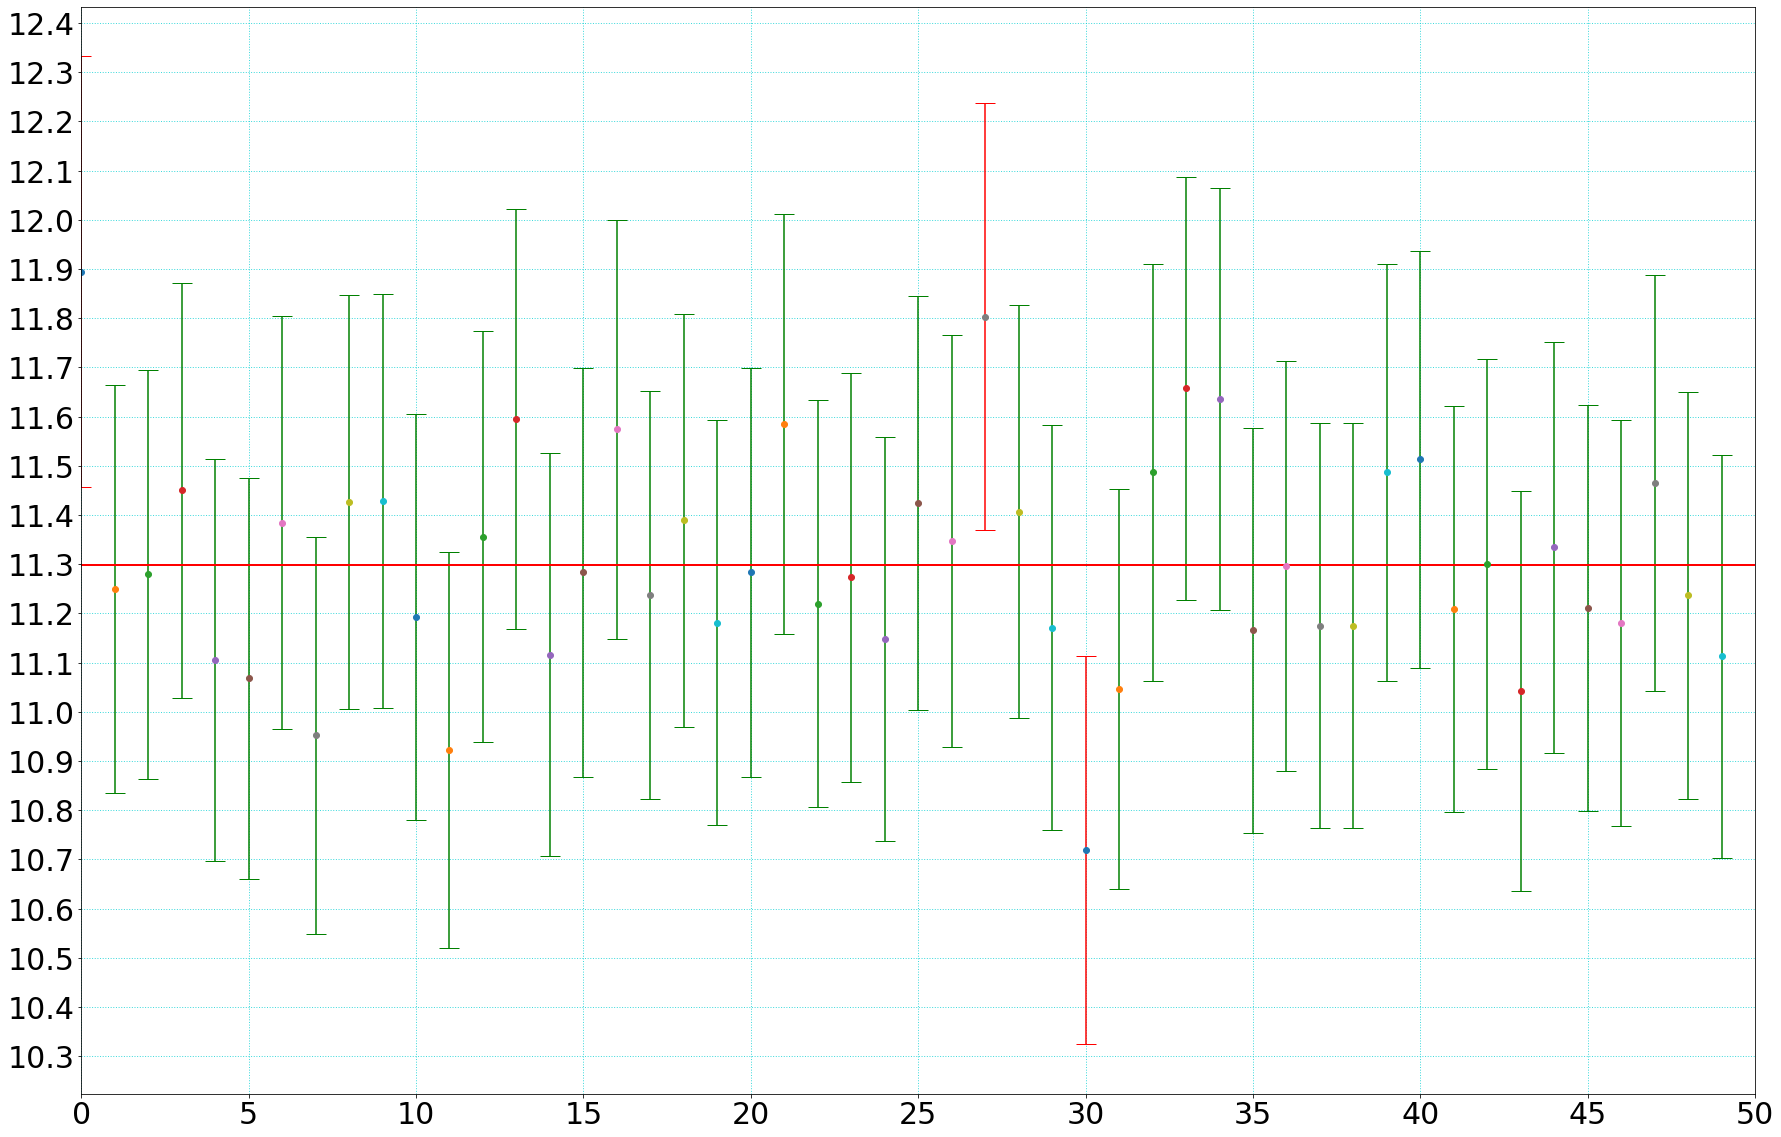

In [108]:
fig,ax =plt.subplots(figsize=(30, 20))
plt.tick_params(labelsize = 30)
ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.1))
plt.tick_params(labelsize = 30)
plt.grid(color='DarkTurquoise', alpha=0.75, linestyle=':', linewidth=1)
plt.xlim(0,50)
k=0
m=0
for i in range(len(intervals)):
    if b[i] < np.std(data)<t[i]:
        plt.errorbar(x=i, y=sample_stds[i], yerr=c[i],fmt='-o',ecolor='g',capsize=10.0)
        m=m+1
    else:
        plt.errorbar(x=i, y=sample_stds[i], yerr=c[i],fmt='-o',ecolor='r',capsize=10)
        k=k+1
plt.hlines(xmin=0, xmax=n, y=data.std(), linewidth=2.0,color="red")

In [109]:
# Для параметра масштаба в случае известного среднего
data = sts.norm.rvs(loc=23, scale=127.69**(1/2), size=100000)
sample_size = 10
sample = np.random.choice(a= data, size = sample_size)
alpha = 0.3
X_ = sample.mean()
S = sample.std(ddof = 1)
sigma_b = (len(sample) - 1) * S/sts.chi2(len(sample) - 1).isf(alpha/2)
sigma_u = (len(sample) - 1) * S/sts.chi2(len(sample) - 1).isf(1 - alpha/2)
confidence_interval = (sigma_b, sigma_u)
print("Доверительный интервал:")
print(confidence_interval)

Доверительный интервал:
(6.475628290458575, 17.865251202336644)


In [110]:
sample_size = 1000
sample_stds=[]
intervals = []
b=[]
t=[]
c=[]
n=100
for sample in range(n):
    sample = np.random.choice(a = data, size = sample_size)
    sample_std0 = math.sqrt(1/len(sample) * sum((sample - data.mean())**2))
    sample_stds.append(sample_std0)
    X_ = sample.mean()
    S = sample.std(ddof = 1)
    sigma_b = (len(sample) - 1) * S/sts.chi2(len(sample) - 1).isf(alpha/2)
    sigma_u = (len(sample) - 1) * S/sts.chi2(len(sample) - 1).isf(1 - alpha/2)
    confidence_interval = (sigma_b, sigma_u)
    intervals.append(confidence_interval)
for bot,top in intervals:
    b.append(bot)
    t.append(top)
    c.append((top-bot)/2)

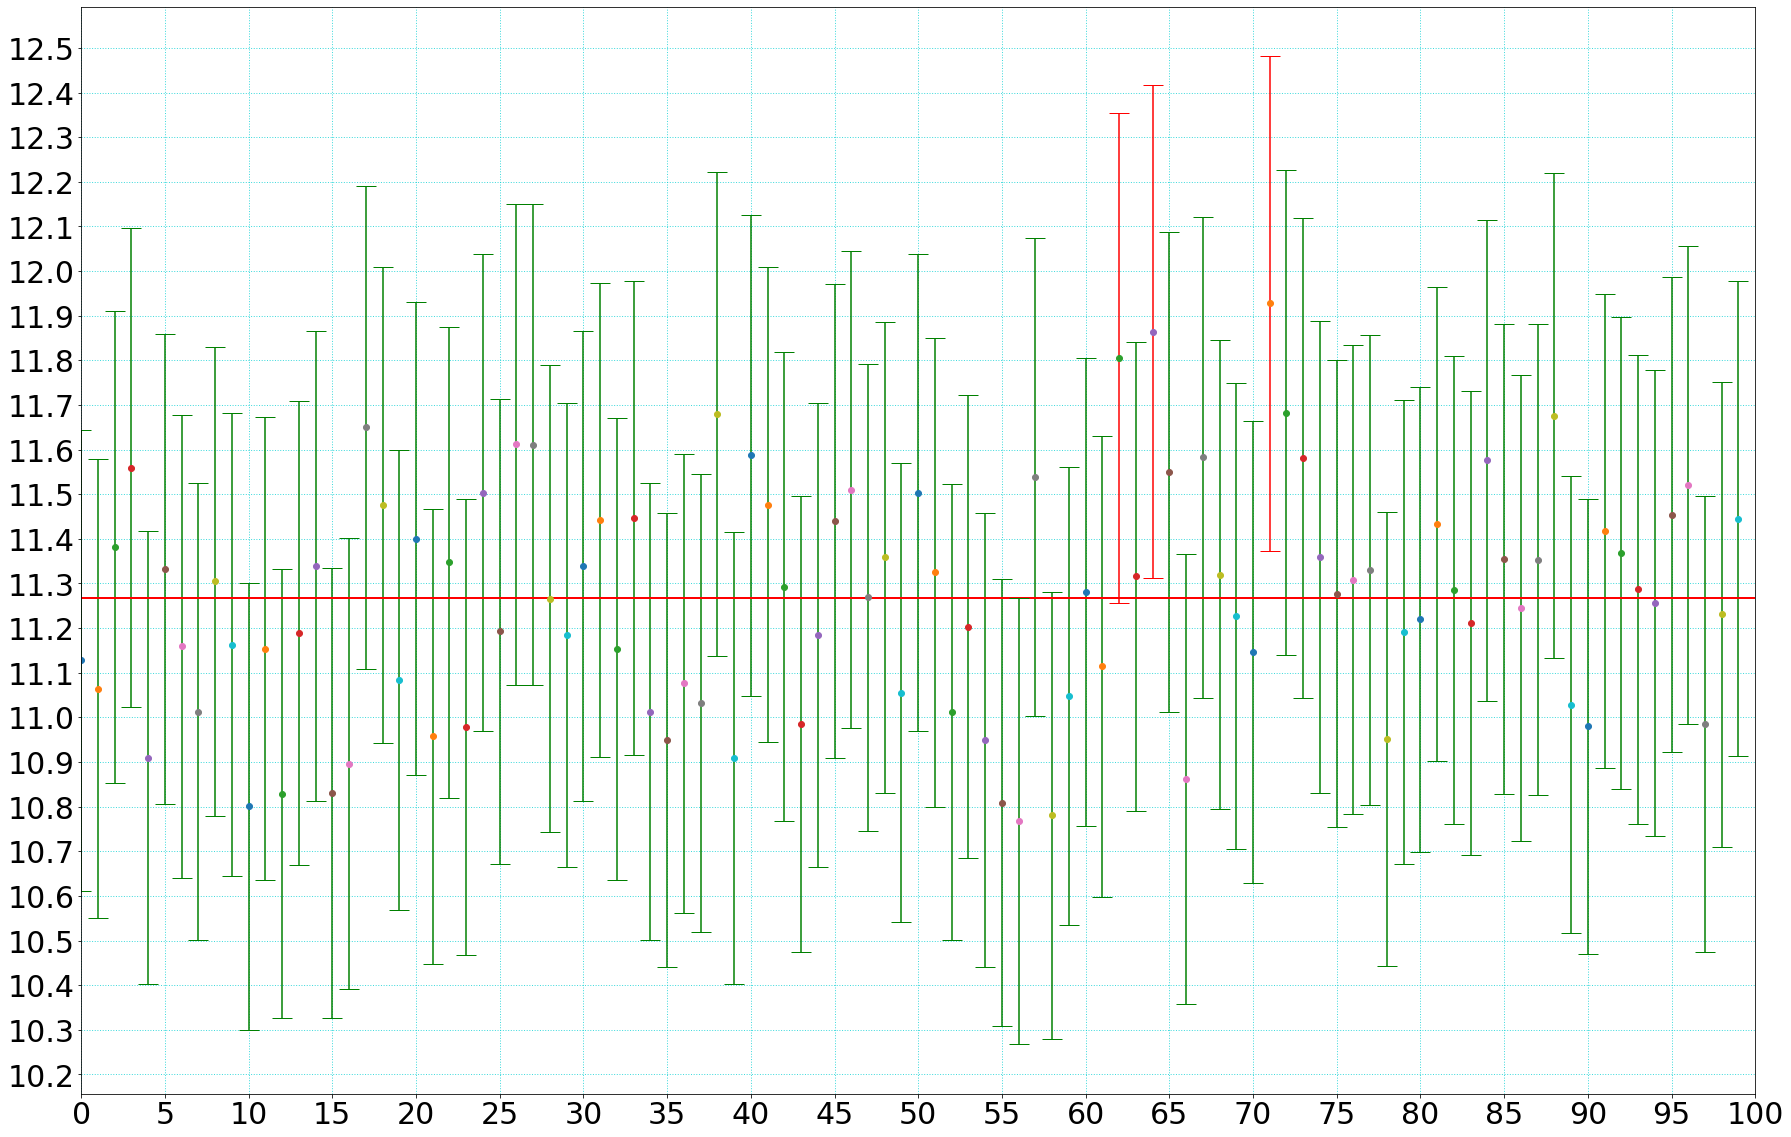

In [111]:
fig,ax =plt.subplots(figsize=(30, 20))
plt.tick_params(labelsize = 30)
ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.1))
plt.tick_params(labelsize = 30)
plt.grid(color='DarkTurquoise', alpha=0.75, linestyle=':', linewidth=1)
plt.xlim(0,100)
k=0
m=0
for i in range(len(intervals)):
    if b[i] < np.std(data)<t[i]:
        plt.errorbar(x=i, y=sample_stds[i], yerr=c[i],fmt='-o',ecolor='g',capsize=10.0)
        m=m+1
    else:
        plt.errorbar(x=i, y=sample_stds[i], yerr=c[i],fmt='-o',ecolor='r',capsize=10)
        k=k+1
plt.hlines(xmin=0, xmax=n, y=data.std(), linewidth=2.0,color="red")

In [116]:
# Коэффициент корреляции для мультинормального распределения
alpha = 0.1
cov = np.array([[1, 0.95], [0.95, 1]])
mean = np.array([0, 0])
X = sts.multivariate_normal(cov = cov, mean = mean)
sample = pd.DataFrame(X.rvs(1000000))
r = sample.corr()[0][1]
I1 = math.tanh(1/2 * sp.log((1 + r)/(1 - r)) - sts.norm.isf(alpha/2)/math.sqrt(sample_size - 3))
I2 = math.tanh(1/2 * sp.log((1 + r)/(1 - r)) + sts.norm.isf(alpha/2)/math.sqrt(sample_size - 3))


In [121]:
cov = np.array([[1, 0.95], [0.95, 1]])
mean = np.array([0, 0])
X = sts.multivariate_normal(cov = cov, mean = mean)
data = pd.DataFrame(X.rvs(1000000))
sample_size = 2000
R=[]
intervals = []
b=[]
t=[]
c=[]
n=50
for sample in range(n):
    sample = data.sample(sample_size)
    r = sample.corr()[0][1]
    R.append(r)
    I1 = math.tanh(1/2 * sp.log((1 + r)/(1 - r)) - sts.norm.isf(alpha/2)/math.sqrt(sample_size - 3))
    I2 = math.tanh(1/2 * sp.log((1 + r)/(1 - r)) + sts.norm.isf(alpha/2)/math.sqrt(sample_size - 3))
    confidence = (I1, I2) 
    intervals.append(confidence)
for bot,top in intervals:
    b.append(bot)
    t.append(top)
    c.append((top-bot)/2)

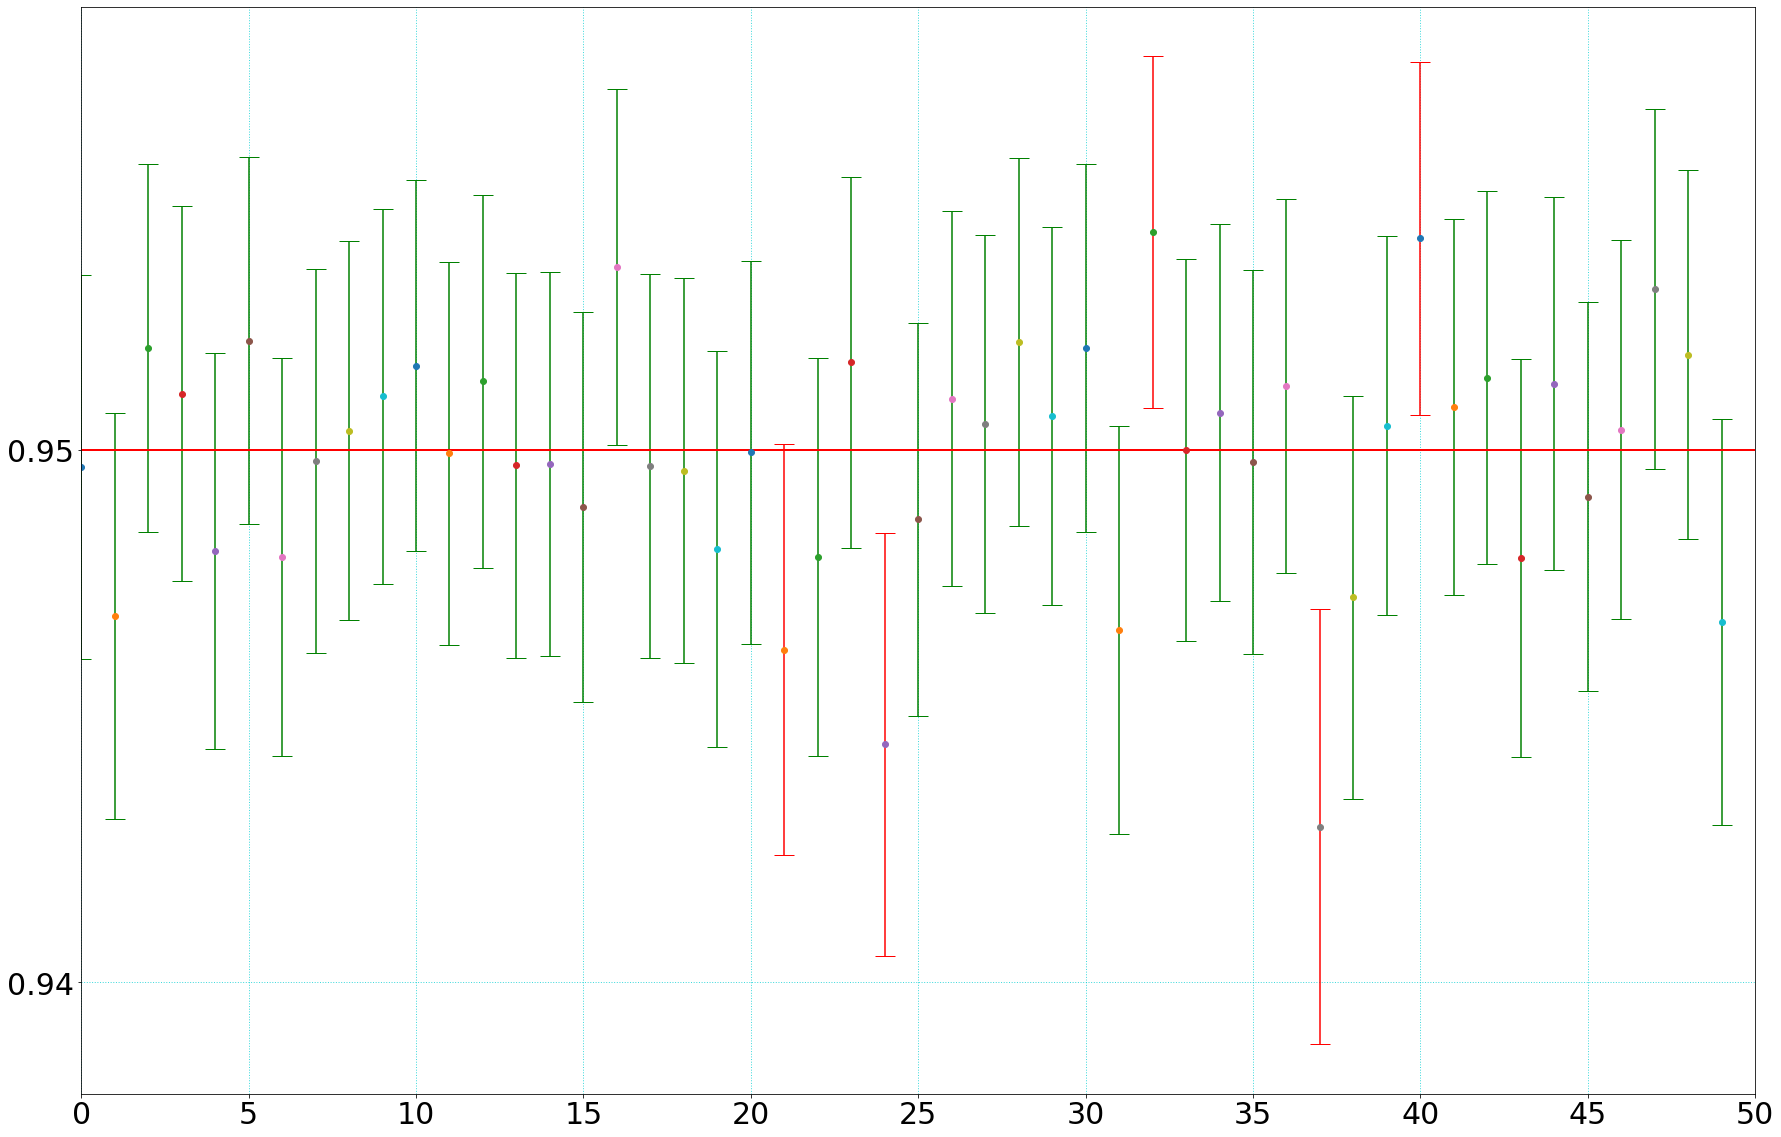

In [122]:
fig,ax =plt.subplots(figsize=(30, 20))
plt.tick_params(labelsize = 30)
ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.01))
plt.tick_params(labelsize = 30)
plt.grid(color='DarkTurquoise', alpha=0.75, linestyle=':', linewidth=1)
plt.xlim(0,50)
k=0
m=0
for i in range(len(intervals)):
    if b[i] < 0.95 < t[i]:
        plt.errorbar(x=i, y=R[i], yerr=c[i],fmt='-o',ecolor='g',capsize=10.0)
        m=m+1
    else:
        plt.errorbar(x=i, y=R[i], yerr=c[i],fmt='-o',ecolor='r',capsize=10)
        k=k+1
plt.hlines(xmin=0, xmax=n, y=0.95, linewidth=2.0,color="red")